#### Topic:      Prework Solutions
#### Cohort:   03_Spring2015
#### Date:        01-Apr-2015
#### Author:     Reshama Shaikh

Prework: Required Exercises

https://github.com/datascopeanalytics/metis-data-science-bootcamp-prework/blob/master/exercises.md

Source:     Think Stats (section Using the Code), there is some accompanying code and data. You can get these from the Think Stats repository.
https://github.com/AllenDowney/ThinkStats2

------------------------------------------------------------------------------- 

####Note:

Step1.  Create a directory on your computer.  Below is an example:

/Users/reshamashaikh/ds/metis/metisgh/

Step2.  use GitHub to pull this repo to your computer

git clone https://github.com/AllenDowney/ThinkStats2.git

Step3.  Put your ipython notebook in this directory (that way, it can pull the needed dependencies):  

/Users/reshamashaikh/ds/metis/metisgh/ThinkStats2/code/

(content will match:  https://github.com/AllenDowney/ThinkStats2/tree/master/code )

Step4.  Call your prework solutions notebook:  

0_S_Prework_myname.ipynb

##Table of Contents 
[Exercise01](#1) 

(Think Stats Ex 2.4) 

Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. Compute Cohen’s d to quantify the difference between the groups. How does it compare to the difference in pregnancy length?
 


[Exercise02](#2)

(Think Stats Ex 3.1) 

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.
Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.


[Exercise03](#3)

(Think Stats Ex 4.2) 

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?



[Exercise04](#4)

(Think Stats Ex 7.1) 

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

[Exercise05](#5)

(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.


[Exercise06](#6)

(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.


-----------------------------------------------------------------------------------------

### <a id='1'></a> Exercise 1 
(Think Stats Ex 2.4)

a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others. 

b) Compute Cohen’s d to quantify the difference between the groups. 

c) How does it compare to the difference in pregnancy length?

Note:  Cohen's d is an effect size used to indicate the standardised difference between two means. It can be used, for example, to accompany reporting of t-test and ANOVA results. 

In [75]:
# set working directory
#path_data = "/Users/bk/Github/ThinkStats2/code"

In [76]:
import nsfg
df = nsfg.ReadFemPreg()
print "Length of df: ", len(df)
df.head()

Length of df:  13593


,caseid,pregordr,howpreg_n,howpreg_p,moscurrp,nowprgdk,pregend1,pregend2,nbrnaliv,multbrth,...,laborfor_i,religion_i,metro_i,basewgt,adj_mod_basewgt,finalwgt,secu_p,sest,cmintvw,totalwgt_lb
0,1,1,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,8.8125
1,1,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,3410.389399,3869.349602,6448.271112,2,9,NaN,7.8750
2,2,1,NaN,NaN,NaN,NaN,5,NaN,3,5,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,9.1250
3,2,2,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,7.0000
4,2,3,NaN,NaN,NaN,NaN,6,NaN,1,NaN,...,0,0,0,7226.301740,8567.549110,12999.542264,2,12,NaN,6.1875


In [77]:
firsts = df[df.birthord==1]
others = df[df.birthord>1]
print "Number of first births: ", len(firsts)
print "Number of non-first births: ", len(others)

Number of first births:  4413
Number of non-first births:  4735


In [78]:
print "firsts total birth wt (mean): ", firsts.totalwgt_lb.mean()
print "others total birth wt (mean): ", others.totalwgt_lb.mean()

firsts total birth wt (mean):  7.20109443044
others total birth wt (mean):  7.32585561497


####Question: 1a) Using the variable totalwgt_lb, investigate whether first babies are lighter or heavier than others.
####Answer:   
####First babies are lighter than others (7.20 vs 7.33 lbs)

In [79]:
#b) Compute Cohen’s D to quantify the difference between the groups. 

# Cohen's D function
weight1 = firsts.totalwgt_lb
weight2 = others.totalwgt_lb

def CohenEffectSize(grp1, grp2):
    diff = grp1.mean() - grp2.mean()
    var1 = grp1.var()
    var2 = grp2.var()
    n1, n2 = len(grp1), len(grp2)
    
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / (pooled_var**(0.5))
    return d

print "Cohen's D is", CohenEffectSize(weight1, weight2)

Cohen's D is -0.0886729270726


####Answer:  

####Cohen's D is:  -0.0887

c) How does Cohen's D compare to the difference in pregnancy length? 

In [80]:
len1 = firsts.prglngth
len2 = others.prglngth
print "Cohen's D for birth weight is:", CohenEffectSize(weight1, weight2)
print "Cohen's D for pregnancy length is:", CohenEffectSize(len1,len2)

Cohen's D for birth weight is: -0.0886729270726
Cohen's D for pregnancy length is: 0.0288790446544


####Interpretation
This site has a good interpretation of Cohen's D, effect size:
http://www.uccs.edu/lbecker/effect-size.html

While Cohen's D for birth weight is nearly 3x greater than for pregnancy length, it is still far from even having a "small" effect size.

-------------------------------------------------------------------------------------------

### <a id='2'></a> Exercise 2 
(Think Stats Ex 3.1)

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable NUMKDHH to construct the actual distribution for the number of children under 18 in the household.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means. As a starting place, you can use chap03ex.ipynb. This is an ipython notebook from the ThinkStats2 repository.

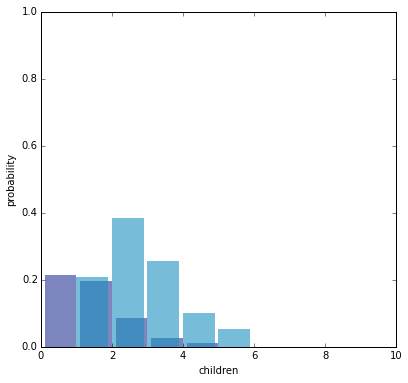

In [81]:
%matplotlib inline
import thinkstats2
import thinkplot
import chap01soln

def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

data = chap01soln.ReadFemResp()
pmf = thinkstats2.Pmf(data.numkdhh)
bias_pmf = BiasPmf(pmf)

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(pmf, align='right')
thinkplot.Hist(bias_pmf, align='left')
thinkplot.Config(xlabel='children',
                 ylabel='probability',
                 axis=[0,10,0,1])
thinkplot.Show()

-------------------------------------------------------------------------------------------

### <a id='3'></a> Exercise 3 
(Think Stats Ex 4.2)

The numbers generated by random.random are supposed to be uniform between 0 and 1; that is, every value in the range should have the same probability.
Generate 1000 numbers from random.random and plot their PMF and CDF. Is the distribution uniform?

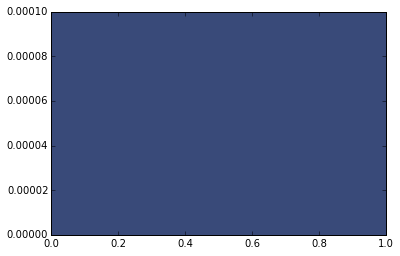

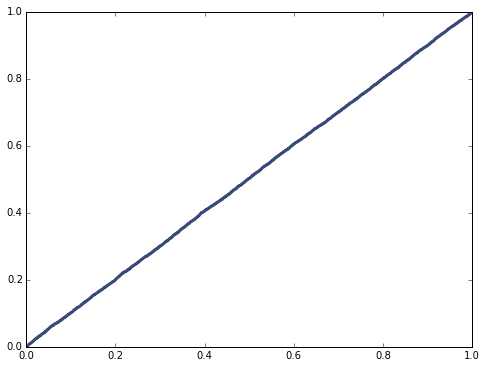

In [82]:
%matplotlib inline
import random
random_list = []
for x in range(0,10000):
    random_list.append(random.random())
random_pmf = thinkstats2.Pmf(random_list)
thinkplot.Pmf(random_pmf)
thinkplot.show()

random_cdf = thinkstats2.Cdf(random_list)
thinkplot.Cdf(random_cdf)
thinkplot.show()

####Answer:
Yes, distribution looks uniform

-------------------------------------------------------------------------------------------

### <a id='4'></a> Exercise 4 
(Think Stats Ex 7.1)

Using data from the NSFG, make a scatter plot of birth weight versus mother’s age. Plot percentiles of birth weight versus mother’s age. Compute Pearson’s and Spearman’s correlations. How would you characterize the relationship between these variables?

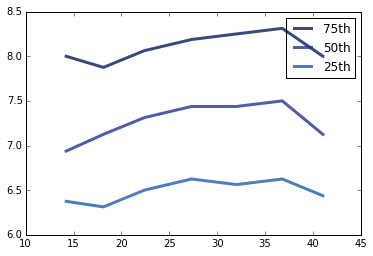

Pearson's Correlation is:  0.0688339703541
Spearman's Correlation is:  0.0946100410966


In [83]:
%matplotlib inline
import numpy as np
import thinkplot

def scatter1():
    birth_weights, mothers_age = df.totalwgt_lb, df.agepreg

    thinkplot.Scatter(birth_weights, mothers_age, alpha=0.1)
    thinkplot.Show(xlabel='Birth Weight(lbs)',
                   ylabel="Mother's Age(yrs)",
                   axis=[0,15,10,60])

def scatter2(df):
    df = df.dropna(subset=['agepreg', 'totalwgt_lb'])
    bins = np.arange(10,70,5)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups]

    for percent in [75,50,25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Show()
    
    pearson_corr = thinkstats2.Corr(df.agepreg, df.totalwgt_lb)  
    spearman_corr = thinkstats2.SpearmanCorr(df.agepreg, df.totalwgt_lb)
    print "Pearson's Correlation is: ", pearson_corr
    print "Spearman's Correlation is: ", spearman_corr


scatter2(df)

####Answer:
The regular scatterplot does not reveal a strong correlation between the two variables and neither Pearson's nor Spearman's correlation is particularly high either. The second scatterplot however shows that the relationship may not be linear. The highest slope on the line is between the ages of 18-27 where the birh weigh seems to increase the most quickly.

-----------------------------------------------------------------------------------------

### <a id='5'></a> Exercise 5
(Think Stats Ex 8.2)

Suppose that you draw a sample with size n = 10 from an exponential distribution with λ = 2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of n and make a plot of standard error versus n.

In [86]:
%matplotlib inline
def RMSE(estimates, actual):
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return mse**(0.5)

def ex5(n):
    l_estimates = []

    for x in range(1000):
        xs = np.random.exponential(0.5,n)
        L = 1.0 / np.mean(xs)
        l_estimates.append(L)

    cdf = thinkstats2.Cdf(l_estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)

    stderr = RMSE(l_estimates, 2)

#     thinkplot.Cdf(cdf)
#     thinkplot.show()

    print "for n value of ", n
    print "standard error: ", stderr 
    print "confidence interval:", ci
    print ""

ex5(10)
ex5(50)
ex5(250)
ex5(1000)

for n value of  10
standard error:  0.821686187353
confidence interval: (1.2384709720449785, 3.5525999328505451)

for n value of  50
standard error:  0.30017596687
confidence interval: (1.5879442530393792, 2.537916293250813)

for n value of  250
standard error:  0.130621756999
confidence interval: (1.8155871927081868, 2.2425771239667651)

for n value of  1000
standard error:  0.0652595134072
confidence interval: (1.8964302868098153, 2.1076969224713382)



-----------------------------------------------------------------------------------------

### <a id='6'></a> Exercise 6
(Think Stats Ex 2.1 Bayes)

The cookie problem is a problem discussed in sections 1.3, 2.2 and 2.3 of Think Bayes. Solve the following problem. In Section 2.3 I said that the solution to the cookie problem generalizes to the case where we draw multiple cookies with replacement. But in the more likely scenario where we eat the cookies we draw, the likelihood of each draw depends on the previous draws.

Modify the solution in this chapter to handle selection without replacement. Hint: add instance variables to Cookie to represent the hypothetical state of the bowls, and modify Likelihood accordingly. You might want to define a Bowl object.

In [87]:
from thinkbayes import Pmf


class Cookie(Pmf):
    """A map from string bowl ID to probablity."""

    def __init__(self, hypos):
        """Initialize self.
        hypos: sequence of string bowl IDs
        """
        Pmf.__init__(self)
        for hypo in hypos:
            self.Set(hypo, 1)
        self.Normalize()

    def Update(self, data):
        """Updates the PMF with new data.
        data: string cookie type
        """
        for hypo in self.Values():
            like = self.Likelihood(data, hypo)
            self.Mult(hypo, like)
        self.Normalize()

    mixes = {
        'Bowl 1':dict(vanilla=30, chocolate=10),
        'Bowl 2':dict(vanilla=20, chocolate=20),
        }

    def Likelihood(self, data, hypo):
        """The likelihood of the data under the hypothesis.
        data: string cookie type
        hypo: string bowl ID
        """

        mix = self.mixes[hypo]
        like = mix[data]
        self.mixes[hypo][data] -= 1 
        print mix
        return like


def main():
    hypos = ['Bowl 1', 'Bowl 2']

    pmf = Cookie(hypos)

    #first pick
    pmf.Update('vanilla')
    for hypo, prob in pmf.Items():
        print hypo, prob
    
    #second pick
    pmf.Update('chocolate')
    for hypo, prob in pmf.Items():
        print hypo, prob
        
    #third pick
    pmf.Update('chocolate')
    for hypo, prob in pmf.Items():
        print hypo, prob
        

if __name__ == '__main__':
    main()

{'vanilla': 19, 'chocolate': 20}
{'vanilla': 29, 'chocolate': 10}
Bowl 2 0.4
Bowl 1 0.6
{'vanilla': 19, 'chocolate': 19}
{'vanilla': 29, 'chocolate': 9}
Bowl 2 0.571428571429
Bowl 1 0.428571428571
{'vanilla': 19, 'chocolate': 18}
{'vanilla': 29, 'chocolate': 8}
Bowl 2 0.73786407767
Bowl 1 0.26213592233
